# 【問題1】1次関数

In [225]:
import numpy as np

array_x = np.linspace(-50, 50 ,1001)
array_y = np.array(1/2*array_x +1)
print(array_x)
print(array_y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


# 【問題2】配列の結合

In [226]:
array_x = array_x.reshape(1001, 1)
array_y = array_y.reshape(1001, 1)
array_xy = np.concatenate([array_x, array_y], axis = 1)
#print(array_xy)

# 【問題3】勾配を求める

In [227]:
array_x = np.linspace(-50, 50 ,1001)
d_x = array_x[1:] - array_x[:-1]
#print(d_x)

In [228]:
array_y = np.array(1/2*array_x +1)
d_y = array_y[1:] - array_y[:-1]
#print(d_y)

In [229]:
d_xy = d_y/d_x
#print(d_xy)

# 【問題4】グラフを描く

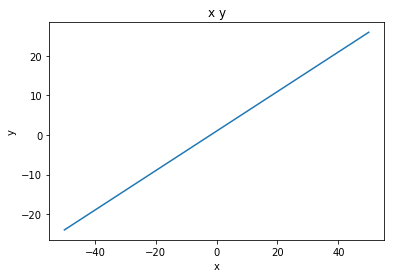

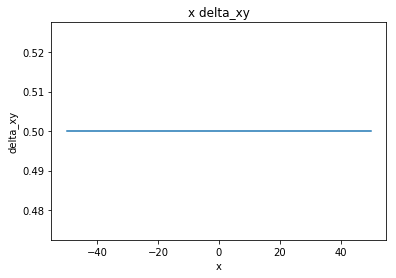

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("x y")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_x, array_y)
plt.show()

plt.title("x delta_xy")
plt.xlabel("x")
plt.ylabel("delta_xy")
plt.plot(array_x[:-1], d_xy)
plt.show()

# 【問題5】Pythonの関数化

In [231]:
def compute_gradient(function, array_x):
    
    array_y = function
    d_x = array_x[1:] - array_x[:-1]
    d_y = array_y[1:] - array_y[:-1]
    gradient = d_y/d_x
    
    array_x = array_x.reshape(-1, 1)
    array_y = array_y.reshape(-1, 1)
    array_xy = np.concatenate([array_x, array_y], axis = 1)
    
    return array_xy, gradient

## function1:　$ y = x^2　(−50≤x≤50) $

In [232]:
def function1(x_range):
    array_y = x_range**2
    return array_y

In [233]:
array_x = np.arange(-50, 50.1, 0.1)
array_xy, gradient = compute_gradient(function1(array_x), array_x)
print(array_xy.shape)
print(gradient.shape)
#print(array_xy)
#print(gradient)

(1001, 2)
(1000,)


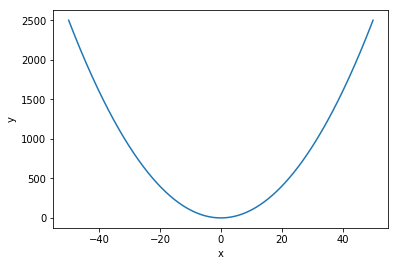

In [234]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_x, array_xy[:,1])
plt.show()

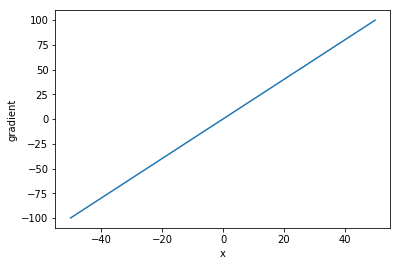

In [235]:
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_x[:-1], gradient)
plt.show()

## function2:　$ y = 2x^2 + 2^x　(−50≤x≤50) $

In [236]:
def function2(x_range):
    array_y = 2*x_range**2 + 2**x_range
    return array_y

In [237]:
array_x = np.arange(-50, 50.1, 0.1)
array_xy, gradient = compute_gradient(function2(array_x), array_x)
print(array_xy.shape)
print(gradient.shape)
#print(array_xy)
#print(gradient)

(1001, 2)
(1000,)


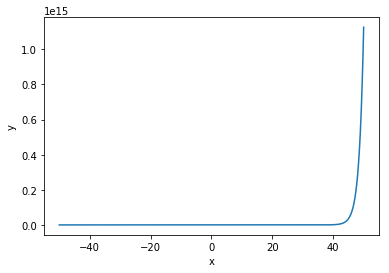

In [238]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_x, array_xy[:,1])
plt.show()

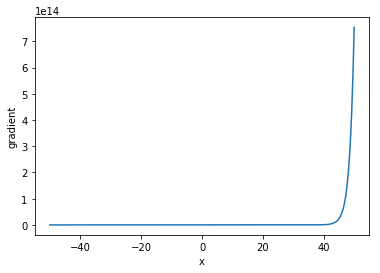

In [239]:
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_x[:-1], gradient)
plt.show()

## function3:　$ y = \sin(x^{1/2})　(0≤x≤50) $

In [240]:
import cmath
def function3_(x_range):
    array_y = []
    for i in range(len(x_range)):
        array_y.append(np.sin(cmath.sqrt(x_range[i])))
    return np.array(array_y)

In [241]:
def function3(x_range):
    array_y = np.sin(np.sqrt(x_range))
    return array_y

# np.sqrtの引数が負の値の場合は戻り値は「複素数」ではなく「nan」になる
# →　「複素数」を戻り値としたい場合は「cmath.sqrt」を使用する。ただし「cmath.sqrt」は配列をまとめて処理できない

In [242]:
array_x = np.arange(0, 50.1, 0.1)
array_xy, gradient = compute_gradient(function3(array_x), array_x)
print(array_xy.shape)
print(gradient.shape)
#print(array_xy)
#print(gradient)

(501, 2)
(500,)


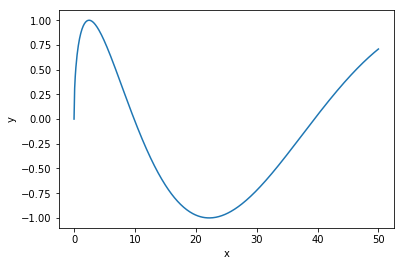

In [243]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_x, array_xy[:,1])
plt.show()

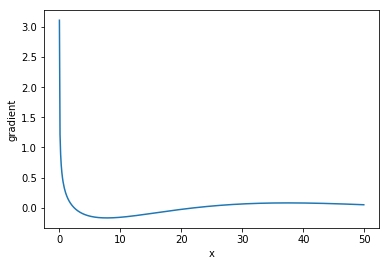

In [244]:
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_x[:-1], gradient)
plt.show()

# 【問題6】最小値を求める

In [249]:
array_x = np.arange(-50, 50.1, 0.1)
array_xy, gradient = compute_gradient(function1(array_x), array_x)

min_y = np.min(array_xy[:, 1])
index_min_y = np.argmin(array_xy[:, 1])
print("最小値：　{}".format(min_y))
print("最小値のインデックス：　{}".format(index_min_y))
print("最小値前後の勾配：　{}".format(gradient[index_min_y-1:index_min_y+2]))

最小値：　5.048709793414476e-25
最小値のインデックス：　500
最小値前後の勾配：　[-0.1  0.1  0.3]


In [250]:
array_x = np.arange(-50, 50.1, 0.1)
array_xy, gradient = compute_gradient(function2(array_x), array_x)

min_y = np.min(array_xy[:, 1])
index_min_y = np.argmin(array_xy[:, 1])
print("最小値：　{}".format(min_y))
print("最小値のインデックス：　{}".format(index_min_y))
print("最小値前後の勾配：　{}".format(gradient[index_min_y-1:index_min_y+2]))

最小値：　0.9505505632959851
最小値のインデックス：　498
最小値前後の勾配：　[-0.41701833  0.02482428  0.46967008]


In [251]:
array_x = np.arange(0, 50.1, 0.1)
array_xy, gradient = compute_gradient(function3(array_x), array_x)

min_y = np.min(array_xy[:, 1])
index_min_y = np.argmin(array_xy[:, 1])
print("最小値：　{}".format(min_y))
print("最小値のインデックス：　{}".format(index_min_y))
print("最小値前後の勾配：　{}".format(gradient[index_min_y-1:index_min_y+2]))

最小値：　-0.9999997540298113
最小値のインデックス：　222
最小値前後の勾配：　[-0.00063884  0.00048745  0.00160612]
